In [235]:
import os
print(os.listdir('../input/caltech101-airplanes-motorbikes-schooners'))

# Tensorflow and Keres Libraris
import tensorflow
from tensorflow.keras.utils import to_categorical as to_cat
from keras import backend as K
from keras.layers import Dense as dns

# Usual Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# Configuration
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Selection of Model
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as lbl_end


from keras.preprocessing.image import ImageDataGenerator as img_dt_gtr

# CNN model libraries
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


# Usage of Tensorflow Optimizer Adam to increase accuraccy of the model.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax


from keras.models import Sequential as squ
import tensorflow as tf
import random as rn

# Required libraries for converting images into numpy arrays.
import cv2                  
import numpy as np  
import os           
import shutil
import collections
from zipfile import ZipFile as zip_f
from random import shuffle
import itertools
import functools
import csv
from tqdm import tqdm
from PIL import Image
import time 


['caltech101_classification']


In [215]:
# Here we are reading data
X = []
Z = []

IMG_SIZE = 200
motorbikes ='../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/Motorbikes'
airplanes ='../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes'
schooner ='../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/schooner'

def lbl_assgn(img,vehicle_type):
    return vehicle_type

In [216]:
# Creating train data function for all classes.
def train_dt_gen(vehicle_type,dir):
    for img in os.listdir(dir):
        lbl = lbl_assgn(img,vehicle_type)           
        path = os.path.join(dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(lbl))
        
# Creating trainging data for each class.
train_dt_gen('Schooner',schooner)
train_dt_gen('Motorbikes',motorbikes)
train_dt_gen('Airplanes',airplanes)

In [217]:
# Vehicle encoding
le = lbl_end()
Y = le.fit_transform(Z)
Y = to_cat(Y,5)
X = np.array(X)
X = X/255

# Splite-Train_Test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [218]:
# TEST #1
# Creating a CNN Model
# Generating Layers
model = squ()

#1st Layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
#3rd Layer
model.add(Conv2D(filters = 96, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(dns(512))
model.add(Activation('relu'))
model.add(dns(5, activation = "softmax"))

# Here we are testing the existing model without contributions.

In [219]:
# Stating the batch size and number of epochs (Forward-Backward Pass Cycles)
batch_size = 60
epochs = 5
from keras.callbacks import ReduceLROnPlateau as rd_on_plt
red_lr= rd_on_plt(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [220]:
datagen = img_dt_gtr(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  # ZCA Whitening
        rotation_range=10,  # Image rotation at random
        zoom_range = 0.1, # Zooming of Images
        width_shift_range=0.2,  # Horizontal shifting of images
        height_shift_range=0.2,  # Vertical shifting of images
        horizontal_flip=True,  # Horizontal flipping of images
        vertical_flip=False)  # Vertically flipping of images

datagen.fit(x_train)

In [221]:
# Using Adamax for optimizing...
model.compile(optimizer = Adamax(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [222]:
# Model Summery
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 46, 46, 96)        55392     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 23, 23, 96)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 50784)           

In [224]:
# Usage of trained data to make predictions.
pred_y = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/5
21/21 [==============================] - 45s 2s/step - loss: 0.8724 - accuracy: 0.6120 - val_loss: 0.4427 - val_accuracy: 0.8966
Epoch 2/5
21/21 [==============================] - 44s 2s/step - loss: 0.3686 - accuracy: 0.8924 - val_loss: 0.2581 - val_accuracy: 0.9303
Epoch 3/5
21/21 [==============================] - 44s 2s/step - loss: 0.2575 - accuracy: 0.9092 - val_loss: 0.2692 - val_accuracy: 0.9207
Epoch 4/5
21/21 [==============================] - 43s 2s/step - loss: 0.2139 - accuracy: 0.9229 - val_loss: 0.2128 - val_accuracy: 0.9423
Epoch 5/5
21/21 [==============================] - 43s 2s/step - loss: 0.1809 - accuracy: 0.9390 - val_loss: 0.2128 - val_accuracy: 0.9399


In [225]:
# Model's Accuraccy.
accuraccy_one = model.evaluate(x_test, y_test)[1]*100
print("Accuracy of Test #1: {0:.2f}%".format(accuraccy_one))

13/13 [==============================] - 3s 228ms/step - loss: 0.2128 - accuracy: 0.9399
Accuracy of Test #1: 93.99%


In [226]:
# TEST #2
# Creating a CNN Model
# Generating Layers

model = squ()

# 1st Layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
# 3rd Layer
model.add(Conv2D(filters =96, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Addition of 4th layer and usage of activation "Softmax" in an attempt to increase the accuraccy.
# 4th Layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation ='softmax'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(dns(512))
model.add(Activation('relu'))
model.add(dns(5, activation = "softmax"))

In [227]:
# Stating the batch size and number of epochs (Forward-Backward Pass Cycles)
batch_size = 60
epochs = 6
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [228]:
datagen = img_dt_gtr(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  # ZCA Whitening
        rotation_range=10,  # Image rotation at random
        zoom_range = 0.1, # Zooming of Images
        width_shift_range=0.2,  # Horizontal shifting of images
        height_shift_range=0.2,  # Vertical shifting of images
        horizontal_flip=True,  # Horizontal flipping of images
        vertical_flip=False)  # Vertically flipping of images

datagen.fit(x_train)

In [229]:
# Usage of Tensorflow's Adam Optimizer instead of Adamax.
model.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [230]:
# Model's Summary.
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 46, 46, 96)        55392     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 21, 21, 128)     

In [231]:
# Usage of trained data to make predictions.
pred_y = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))



Epoch 1/6
21/21 [==============================] - 47s 2s/step - loss: 0.8432 - accuracy: 0.6289 - val_loss: 0.7578 - val_accuracy: 0.6490
Epoch 2/6
21/21 [==============================] - 45s 2s/step - loss: 0.5737 - accuracy: 0.7735 - val_loss: 0.5686 - val_accuracy: 0.7500
Epoch 3/6
21/21 [==============================] - 46s 2s/step - loss: 0.4819 - accuracy: 0.8289 - val_loss: 0.5791 - val_accuracy: 0.7644
Epoch 4/6
21/21 [==============================] - 45s 2s/step - loss: 0.3699 - accuracy: 0.8522 - val_loss: 0.2146 - val_accuracy: 0.9135
Epoch 5/6
21/21 [==============================] - 46s 2s/step - loss: 0.2595 - accuracy: 0.9060 - val_loss: 0.1852 - val_accuracy: 0.9327
Epoch 6/6
21/21 [==============================] - 45s 2s/step - loss: 0.2410 - accuracy: 0.9173 - val_loss: 0.1601 - val_accuracy: 0.9519


In [232]:
# Model's Accuraccy.
accuraccy_two = model.evaluate(x_test, y_test)[1]*100
print("Accuracy of Test #2: {0:.2f}%".format(accuraccy_two))

13/13 [==============================] - 3s 239ms/step - loss: 0.1601 - accuracy: 0.9519
Accuracy of Test #2: 95.19%


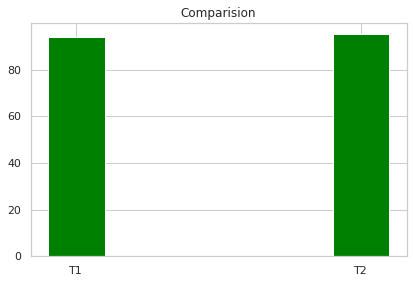

In [233]:
# Generating Bar Chart of comparing two test
float(format(accuraccy_one))
test_cases=['T1','T2']
test_accuracy=[float(format(accuraccy_one)),float(format(accuraccy_two))]
plt.bar(test_cases,test_accuracy, color='green', align='center', width=0.2)
plt.title('Comparision')
plt.show()